In [ ]:
!pip install scikit-learn



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data Collection and processing

In [ ]:
car_dataset = pd.read_csv('/content/car data.csv')

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
car_dataset.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [ ]:
#No of missing datasets
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#Checking distribution
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
#Encoding the categorical data
car_dataset.replace({'Fuel_Type':{'Diesel':0,'Petrol':1,'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,0,0
1,sx4,2013,4.75,9.54,43000,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,1,1,0,0
3,wagon r,2011,2.85,4.15,5200,1,1,0,0
4,swift,2014,4.60,6.87,42450,0,1,0,0


Splitting the data

In [ ]:
x=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          1            1             0   
1    2013           9.54       43000          0            1             0   
2    2017           9.85        6900          1            1             0   
3    2011           4.15        5200          1            1             0   
4    2014           6.87       42450          0            1             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          0            1             0   
297  2015           5.90       60000          1            1             0   
298  2009          11.00       87934          1            1             0   
299  2017          12.50        9000          0            1             0   
300  2016           5.90        5464          1            1             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=2)


Training the model

In [ ]:
linear_regr=LinearRegression()
linear_regr.fit(x_train,y_train)


LinearRegression()

Model Evaluation

In [ ]:
prediction=linear_regr.predict(x_train)

#R square Error
error_score=metrics.r2_score(y_train,prediction)
print("R squared error: ",error_score)

R squared error:  0.8824621379730496


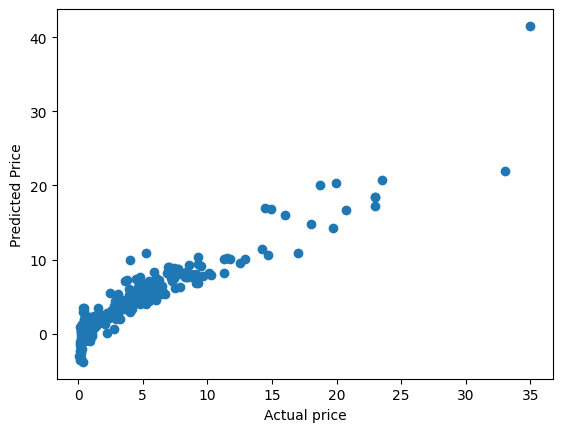

In [ ]:
plt.scatter(y_train,prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.show()

In [ ]:
test_prediction=linear_regr.predict(x_test)
test_error_score=metrics.r2_score(y_test,test_prediction)
print("R squared error: ",test_error_score)

KeyError: 0

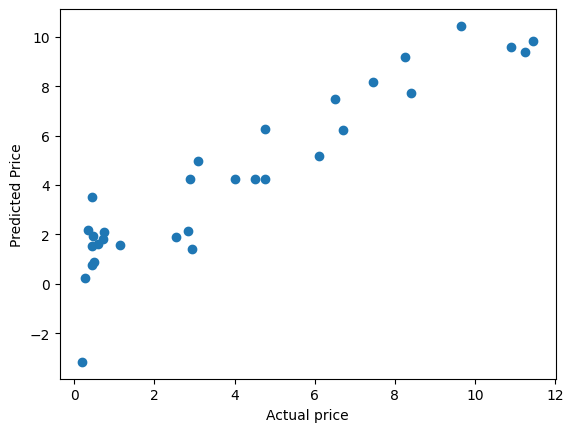

In [ ]:
plt.scatter(y_test,test_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.show()